In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import json

In [5]:
users_file = "/Users/okti/Desktop/users.json"
G = nx.Graph()

names = []
with open(users_file, "r") as f:
    users_data = json.load(f)
    for user in users_data:
        if 'Состоит в хабах' in user:
            for tag in user['Состоит в хабах']:
                if user["tag"] not in G:
                    G.add_node(user["tag"], type='user')
                if tag not in G:
                    G.add_node(tag, type='tag')
                G.add_edge(user["tag"], tag)

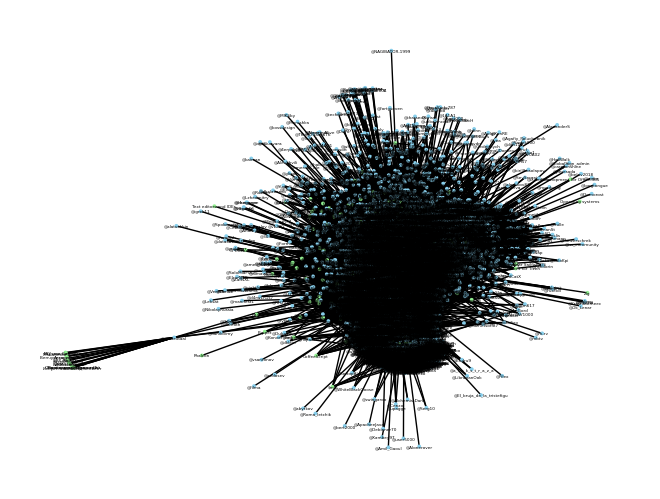

In [7]:
color_map = []

pos = nx.spring_layout(G, k=10.5, iterations=10000)

for node in G:
    if G.nodes[node]['type'] == 'user':
        color_map.append('skyblue')
    else:
        color_map.append('lightgreen')

nx.draw(G, with_labels=True, node_size = 3, node_color=color_map, font_size=3)
plt.savefig('graph_high_resolution.png', dpi=300)

plt.show()